# Análises do mercado financeiro

## 1 Que análises são essas?

Utilizando ferramentas de dados e de visualização, eu posso explorar os dados para obter insights. 

Com isso, eu vou mostrar alguns exemplos da aplicação do Python no mercado financeiro.
 
Realizando uma análise exploratória dos dados, eu vou calcular métricas importantes no mercado financeiro, como retorno, volatilidade, drawdown, distribuições, skewness, dentre outras.

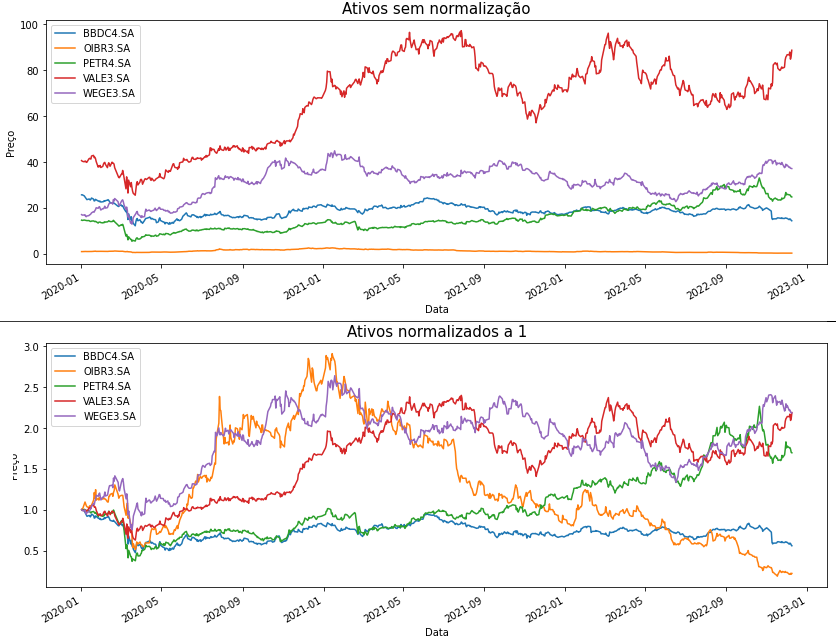

## 2 Obtenção dos dados

Utilizando a biblioteca yfinance, vamos obter os dados de negociação para algum papel, como por exemplo PETR4

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 9.0 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-

Bibliotecas

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Obtendo os dados de PETR4 | start 'data de início da coleta dos dados' 
# Parâmetro 'end' pode ser utilizado para delimitar o período.

petro = yf.download("PETR4.SA", start="2020-01-01")

[*********************100%***********************]  1 of 1 completed


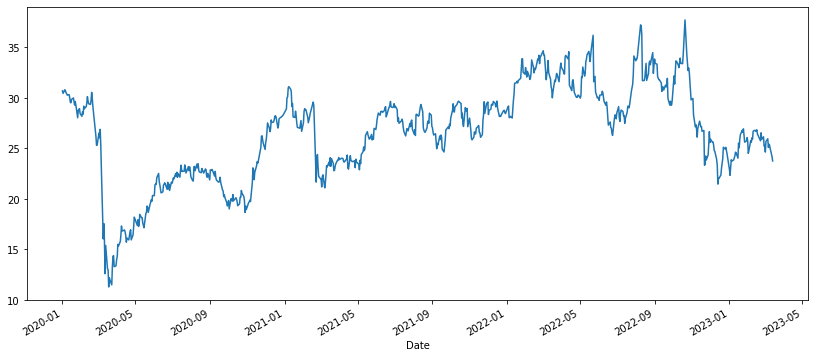

In [6]:
# Plota o gráfico do preço de fechamento.

petro.Close.plot(figsize = (14,6));

## 3 Médias móveis

### 3.1. O que são médias móveis?

Porque elas são tão importantes no mercado financeiro?

Algumas métricas com as quais podemos criar médias móveis: preço, retorno, volatilidade, drawdown


### 3.2. Médias móveis do preço

In [8]:
# Preço de fechamento diário.

petro.Close.head(10)

Date
2020-01-02    30.700001
2020-01-03    30.450001
2020-01-06    30.809999
2020-01-07    30.690001
2020-01-08    30.500000
2020-01-09    30.400000
2020-01-10    30.270000
2020-01-13    30.330000
2020-01-14    30.000000
2020-01-15    29.549999
Name: Close, dtype: float64

In [9]:
# Média de 5 dias 

petro.Close.rolling(5).mean()

Date
2020-01-02       NaN
2020-01-03       NaN
2020-01-06       NaN
2020-01-07       NaN
2020-01-08    30.630
               ...  
2023-03-08    25.364
2023-03-09    25.498
2023-03-10    25.354
2023-03-13    25.000
2023-03-14    24.732
Name: Close, Length: 795, dtype: float64

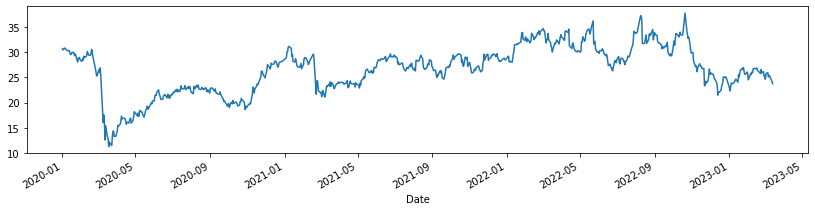

In [10]:
# Preço de fechamento.

petro.Close.plot(figsize = (14,3));

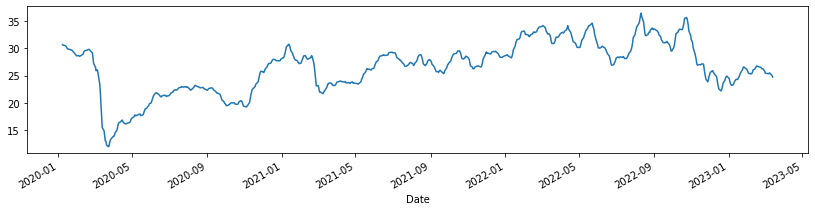

In [11]:
# Média de 5 dias.

petro.Close.rolling(5).mean().plot(figsize = (14,3));

<AxesSubplot:xlabel='Date'>

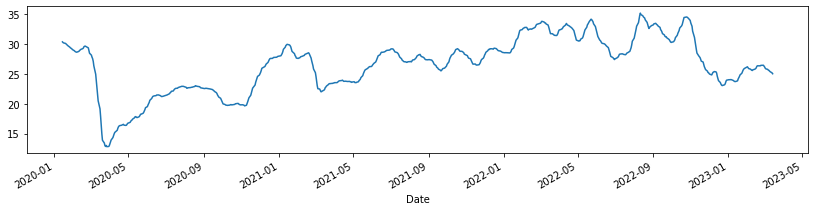

In [12]:
# Média de 10 dias.

petro.Close.rolling(10).mean().plot(figsize = (14,3))

<AxesSubplot:xlabel='Date'>

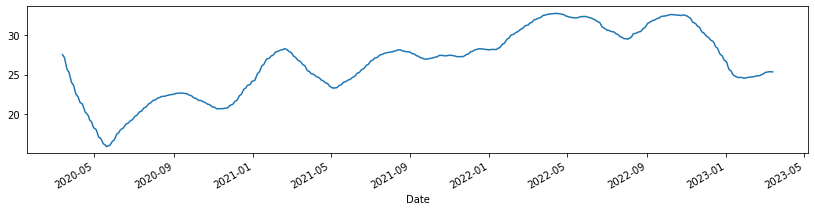

In [13]:
# Média de 50 dias.

petro.Close.rolling(50).mean().plot(figsize = (14,3))

<AxesSubplot:xlabel='Date'>

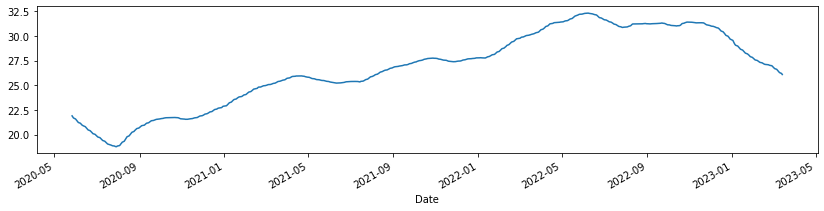

In [14]:
# Média de 100 dias

petro.Close.rolling(100).mean().plot(figsize = (14,3))

## 4 Retornos diários

In [18]:
# Informações de preço:
# Abertura, máxima, mínima, fechamento, ajuste e volume
 
petro.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,30.510000,30.700001,30.309999,30.700001,14.581382,37774500
2020-01-03,30.879999,31.240000,30.450001,30.450001,14.462639,71595600
2020-01-06,30.430000,30.940001,29.950001,30.809999,14.633624,81844000
2020-01-07,30.820000,30.879999,30.469999,30.690001,14.576630,32822000
2020-01-08,30.690001,30.770000,30.240000,30.500000,14.486386,48215600


Calculando os retornos diários

In [19]:
# Variação percentual diária dos preços ajustados de fechamento.
# dropna() remove valores ausentes. Isso é feito porque o primeiro dia 
# não tem variação percentual calculada.

petro['Adj Close'].pct_change().dropna()

Date
2020-01-03   -0.008143
2020-01-06    0.011823
2020-01-07   -0.003895
2020-01-08   -0.006191
2020-01-09   -0.003279
                ...   
2023-03-08    0.012749
2023-03-09   -0.004327
2023-03-10   -0.013038
2023-03-13   -0.031625
2023-03-14   -0.017776
Name: Adj Close, Length: 794, dtype: float64

In [20]:
# Criando um objeto DataFrame chamado "retornos", que contém a variação percentual 
# diária dos preços ajustados de fechamento

retornos = pd.DataFrame(petro['Adj Close'].pct_change().dropna())
retornos

,Adj Close
Date,
2020-01-03,-0.008143
2020-01-06,0.011823
2020-01-07,-0.003895
2020-01-08,-0.006191
2020-01-09,-0.003279
...,...
2023-03-08,0.012749
2023-03-09,-0.004327
2023-03-10,-0.013038


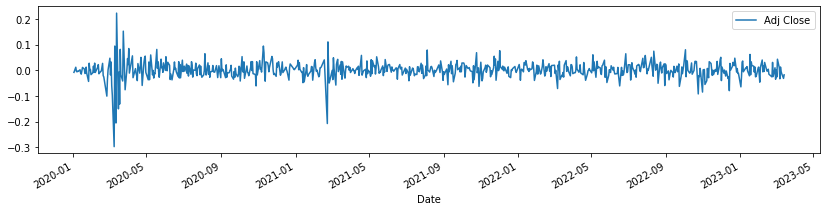

In [21]:
# Gráfico dos retornos diários.

retornos.plot(figsize = (14,3));

In [22]:
# Média dos retornos.

retornos.mean()

Adj Close    0.001163
dtype: float64

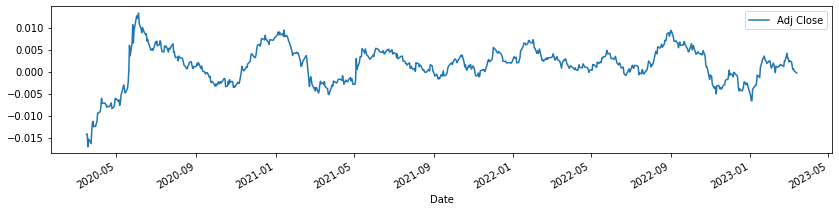

In [23]:
# Média móvel dos retornos.

retornos.rolling(50).mean().plot(figsize = (14,3));

## 5 Volatilidade

A medida mais básica de volatilidade que podemos ter é o desvio padrão

In [24]:
# Calculando o desvio padrão dos retornos diários

retornos.std()

Adj Close    0.032528
dtype: float64

Portanto, essa é a volatilidade de PETR4 no período

E se quiséssemos visualizar a volatilidade em janelas de tempo, isto é, o comportamento da volatilidade de PETR4 ao longo de períodos específicos de tempo, por exemplo, 10 dias?

In [25]:
# Volatilidade calculada para cada janela de 10 dias

janelas_vol = retornos.rolling(10).std()

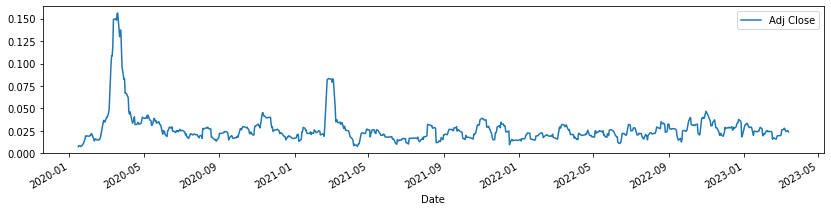

In [26]:
janelas_vol.plot(figsize = (14,3));

## 6 Métricas estatísticas

In [ ]:
# Estatísticas descritivas dos preços ajustados de fechamento da ação PETR4.

retornos.describe()

,Adj Close
count,3210.000000
mean,0.000608
std,0.029052
min,-0.296978
25%,-0.014118
50%,0.000000
75%,0.014649
max,0.222222


## 7 Distribuição dos retornos

A visualização do histograma pode ajudar a identificar padrões de distribuição dos retornos e avaliar a presença de valores atípicos. 

No caso da ação PETR4, por exemplo, um histograma pode indicar se a distribuição dos retornos é normal ou não, bem como a presença de volatilidade ou riscos incomuns.

Forma de entender onde os retornos se "concentram" com o tempo

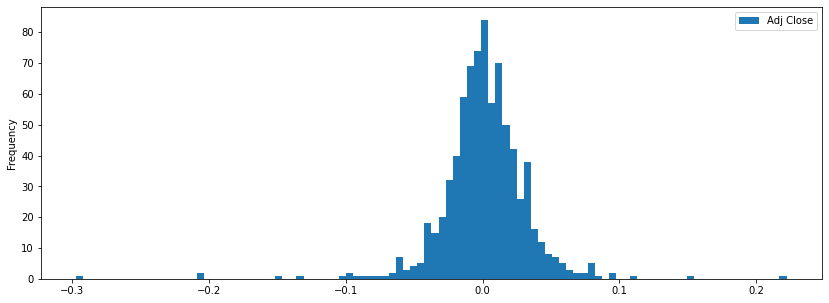

In [27]:
# Histograma dos retornos diários

retornos.plot.hist(bins = 100, figsize = (14,5));

## 8 Drawdown em janela de 30 dias

Perda máxima em um determinado período - distância entre ganho máximo e a mínima

In [30]:
# Contém o drawdown máximo (perda máxima em relação ao pico anterior) em uma 
# janela móvel de 30 dias dos retornos diários da ação PETR4.

dd_30 = retornos.rolling(30).min()

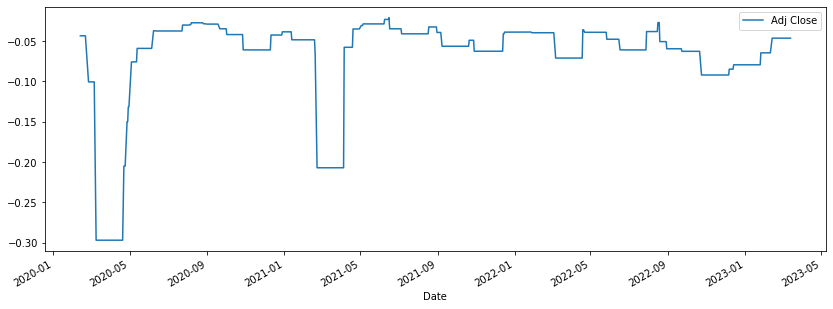

In [31]:
dd_30.plot(figsize = (14,5));

## 9 Métricas de retorno acumulado

In [32]:
# Calculando o retorno acumulado

ret_acum = (retornos + 1).cumprod()
ret_acum

,Adj Close
Date,
2020-01-03,0.991857
2020-01-06,1.003583
2020-01-07,0.999674
2020-01-08,0.993485
2020-01-09,0.990228
...,...
2023-03-08,1.743319
2023-03-09,1.735775
2023-03-10,1.713144


A primeira parte do código, "retornos", é o objeto DataFrame que contém a variação percentual diária dos preços ajustados de fechamento da ação PETR4.

Em seguida, "+1" é adicionado aos retornos, o que significa que 1 é somado a cada valor do objeto DataFrame "retornos". Isso é feito para calcular os retornos acumulados da ação PETR4, onde cada valor representa a variação percentual do preço ajustado de fechamento em relação ao preço inicial.

Por fim, ".cumprod()" é um método que calcula o produto cumulativo dos valores do objeto DataFrame "retornos" (ou seja, multiplica cada valor do objeto DataFrame pelo valor anterior e acumula o resultado). Esse método retorna um objeto DataFrame que contém os retornos acumulados da ação PETR4 ao longo do tempo. O resultado da operação é então atribuído ao objeto DataFrame "ret_acum".

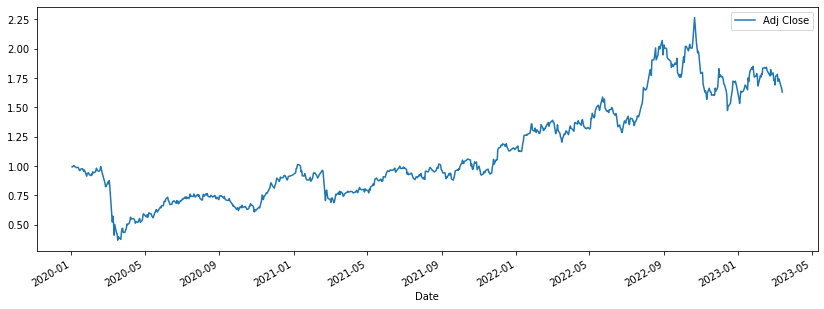

In [33]:
ret_acum.plot(figsize = (14,5));

In [34]:
# "picos" que contém o valor máximo histórico dos retornos acumulados da ação 
# PETR4 ao longo do tempo.

picos = ret_acum.cummax()
picos

,Adj Close
Date,
2020-01-03,0.991857
2020-01-06,1.003583
2020-01-07,1.003583
2020-01-08,1.003583
2020-01-09,1.003583
...,...
2023-03-08,2.263368
2023-03-09,2.263368
2023-03-10,2.263368


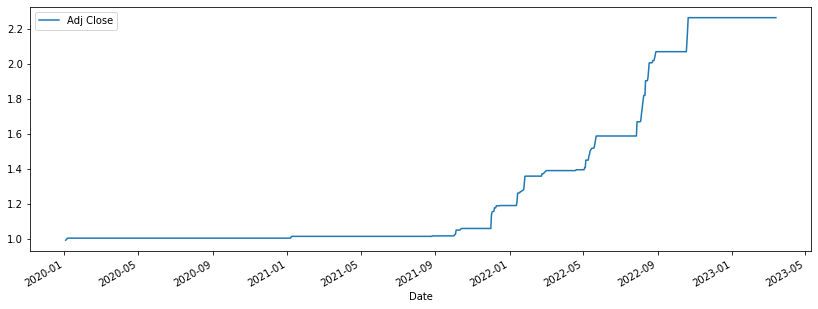

In [35]:
picos.plot(figsize = (14,5));

#### Drawdown

Forma alternativa de cálculo do drawdown, considerando a diferença entre o retorno acumulado e os picos.

In [39]:
# Proporção da perda em relação ao valor máximo histórico em cada ponto no tempo

drawdown = (ret_acum - picos)/picos

"ret_acum", é o objeto DataFrame que contém os retornos acumulados da ação PETR4 ao longo do tempo.

Em seguida, é subtraído de "ret_acum" o objeto DataFrame "picos", que contém o valor máximo histórico dos retornos acumulados em cada ponto no tempo. A subtração dos valores resulta em um objeto DataFrame que contém a diferença entre o valor máximo histórico e o retorno acumulado em cada ponto no tempo, ou seja, a perda em relação ao pico anterior.

Em seguida, é feita uma divisão do resultado anterior pelo objeto DataFrame "picos", que contém o valor máximo histórico dos retornos acumulados em cada ponto no tempo. Essa divisão resulta em um objeto DataFrame que contém a proporção da perda em relação ao valor máximo histórico em cada ponto no tempo, ou seja, o drawdown.

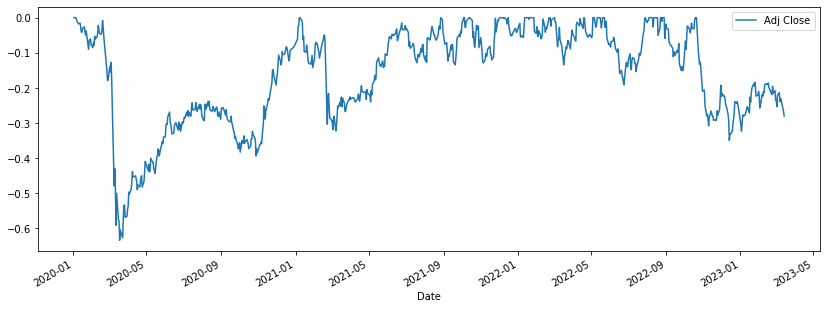

In [40]:
drawdown.plot(figsize = (14,5));

Drawdown máximo.

É o valor mais 'fundo' que o gráfico acima atinge

In [41]:
max_ddw = drawdown.min()
max_ddw

Adj Close   -0.63356
dtype: float64

In [42]:
# Adiciona três colunas ao objeto DataFrame "retornos":
#  "Retorno Acumulado", "Picos" e "Drawdowns".

retornos['Retorno Acumulado'] = ret_acum
retornos['Picos'] = picos
retornos['Drawdowns'] = drawdown

In [43]:
# Exibe o DataFrame.

retornos.head()

,Adj Close,Retorno Acumulado,Picos,Drawdowns
Date,,,,
2020-01-03,-0.008143,0.991857,0.991857,0.000000
2020-01-06,0.011823,1.003583,1.003583,0.000000
2020-01-07,-0.003895,0.999674,1.003583,-0.003895
2020-01-08,-0.006191,0.993485,1.003583,-0.010062
2020-01-09,-0.003279,0.990228,1.003583,-0.013307


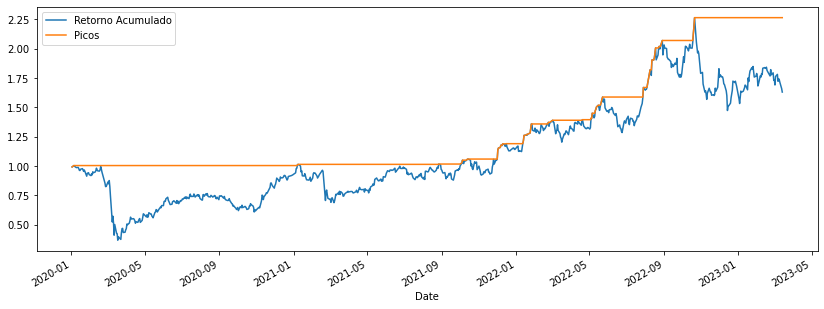

In [44]:
# Plota um gráfico com as colunas "Retorno Acumulado" e "Picos" do DataFrame "retornos".

retornos[['Retorno Acumulado', 'Picos']].plot(figsize = (14,5));

## 10 Normalização

Para explicar o conceito de normalização, vamos obter dados de vários papéis ao mesmo tempo para ficar mais fácil de exemplificar

In [45]:
acoes = ['PETR4.SA', 'WEGE3.SA', 'VALE3.SA', 'BBDC4.SA', 'OIBR3.SA']

In [46]:
# Download do histórico de preços ajustados das ações especificadas no objeto "acoes"

data = yf.download(acoes, start="2020-01-01")['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [47]:
data.head()

,BBDC4.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2020-01-02,24.539320,8.6,14.581379,39.578945,16.880943
2020-01-03,24.551739,8.6,14.462639,39.287548,16.665373
2020-01-06,24.113197,9.2,14.633623,39.054424,16.708487
2020-01-07,23.694296,9.4,14.576629,39.338539,16.837824
2020-01-08,23.327759,9.2,14.486387,39.345825,16.200720


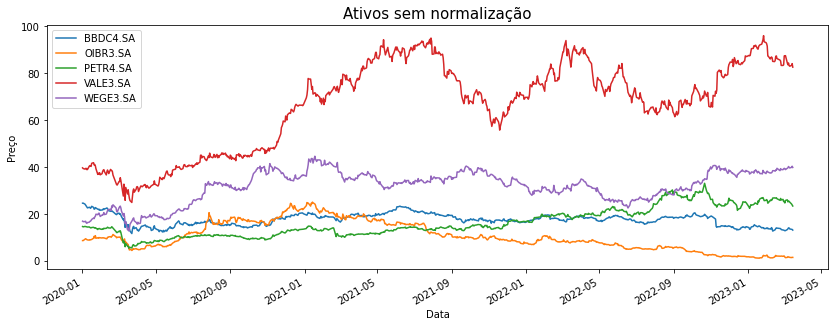

In [49]:
data.plot(figsize = (14,5))
plt.title('Ativos sem normalização', fontsize = 15)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

Observe que é 'injusto' realizar uma comparação de um papel numa magnitude mais alta com outros que possuem o preço menor.

Introduzindo conceito da normalização

In [50]:
normalizado = data/data.iloc[0]

Código divide o objeto "data" pelos preços ajustados da primeira linha do objeto "data". 

Dessa forma, os preços ajustados de todas as ações serão normalizados pelo valor da primeira linha, isto é, o valor de cada ação na data inicial será igual a 1.

In [52]:
normalizado.head()

,BBDC4.SA,OIBR3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-03,1.000506,1.000000,0.991857,0.992638,0.987230
2020-01-06,0.982635,1.069767,1.003583,0.986747,0.989784
2020-01-07,0.965564,1.093023,0.999674,0.993926,0.997446
2020-01-08,0.950628,1.069767,0.993485,0.994110,0.959705


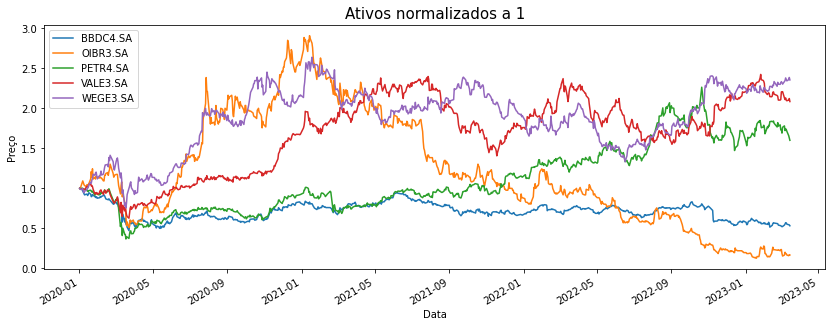

In [53]:
normalizado.plot(figsize = (14,5))
plt.title('Ativos normalizados a 1', fontsize = 15)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

**Os valores das ações normalizados permite uma comparação adequada do desempenho de diferentes ações ao longo do tempo.** 